In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [182]:
# load the dataset
x_train = np.array([2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8])
y_train = np.array([21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86])

In [183]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [2.5 5.1 3.2 8.5 3.5]


In [184]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [21 47 27 75 30]


In [185]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (25,)
The shape of y_train is:  (25,)
Number of training examples (m): 25


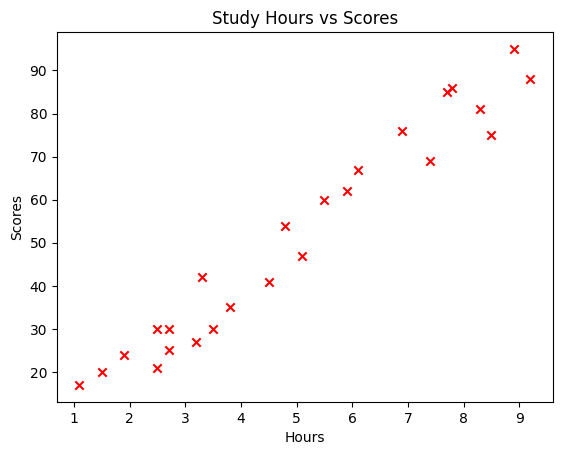

In [187]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Study Hours vs Scores")
# Set the y-axis label
plt.ylabel('Scores')
# Set the x-axis label
plt.xlabel('Hours')
plt.show()

<a name="4"></a>
## 4 - Refresher on linear regression

- The model function for linear regression, which is a function that maps from `x` (hours) to `y` (marks) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (hours) and output a prediction $f_{w,b}(x)$ (predicted marks).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful to monitor the progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 

#### Cost function
For one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of marks, as opposed to $y^{(i)}$, which is the actual marks that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

<a name="ex01"></a>
### Exercise 1

Function `compute_cost` below:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [188]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) 
        y (ndarray): Shape (m,) 
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
     
    for i in range(len(x)):
        f_wb = w*x[i] +b
        cost = (f_wb - y[i])**2
        total_cost += cost
    
    
    total_cost /= 2*m

    return total_cost

Check if the implementation was correct by running the following test code:

In [190]:
# Compute cost with some initial values for paramaters w, b
initial_w = 0
initial_b = 0

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w={initial_w}, b={initial_b}: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w=0, b=0: 1632.020


<a name="6"></a>
## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

<a name="ex02"></a>
### Exercise 2

Function `compute_gradient` below:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [191]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        
        dj_db_i = f_wb - y[i]
        dj_dw_i = (f_wb - y[i]) * x[i]
        
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_db /= m
    dj_dw /= m
        
    return dj_dw, dj_db

Run the cells below to check the implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [192]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -317.856 -51.48


In [194]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -310.6053599999999 -50.27759999999999


<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.

In [195]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [198]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   761.35   
Iteration  150: Cost    14.48   
Iteration  300: Cost    14.47   
Iteration  450: Cost    14.45   
Iteration  600: Cost    14.45   
Iteration  750: Cost    14.45   
Iteration  900: Cost    14.44   
Iteration 1050: Cost    14.44   
Iteration 1200: Cost    14.44   
Iteration 1350: Cost    14.44   
w,b found by gradient descent: 9.783902309756003 2.433499185691026


We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [199]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

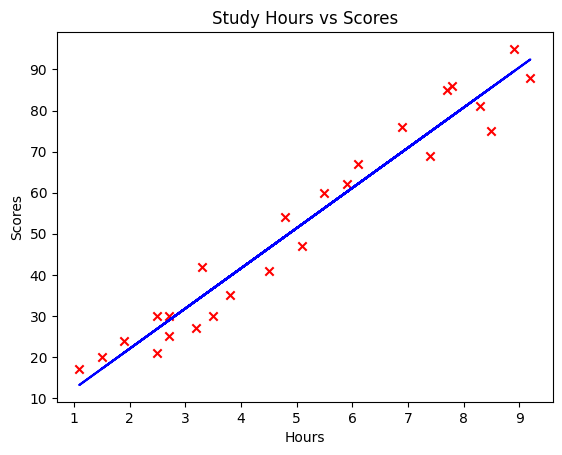

In [200]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r') 
# Set the title
plt.title("Study Hours vs Scores")
# Set the y-axis label
plt.ylabel('Scores')
# Set the x-axis label
plt.xlabel('Hours')
plt.show()